In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tugiyanto","key":"3717f320d2db3918180779fae752f255"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [6]:
!kaggle datasets download -d fedesoriano/hepatitis-c-dataset

  0% 0.00/14.8k [00:00<?, ?B/s]
100% 14.8k/14.8k [00:00<00:00, 31.7MB/s]


In [8]:
!unzip hepatitis-c-dataset.zip

Archive:  hepatitis-c-dataset.zip
  inflating: HepatitisCdata.csv      


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('HepatitisCdata.csv')

In [13]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [14]:
df.tail()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0
614,615,3=Cirrhosis,59,f,36.0,NaN,100.0,80.0,12.0,9.07,5.30,67.0,34.0,68.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [16]:
df.shape

(615, 14)

In [17]:
df.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [18]:
# replacing the null with the mean
df['ALB'].fillna(df['ALB'].mean(), inplace=True)
df['ALP'].fillna(df['ALP'].mean(), inplace=True)
df['CHOL'].fillna(df['CHOL'].mean(), inplace=True)
df['PROT'].fillna(df['PROT'].mean(), inplace=True)
df['ALT'].fillna(df['ALT'].mean(), inplace=True)

In [19]:
# dropping the Unnamed coloumn
df.drop("Unnamed: 0",axis=1,inplace=True)

In [20]:
df.isnull().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

In [21]:
df['Category'] = df['Category'].replace({
    '0=Blood Donor': 0,
    '0s=suspect Blood Donor': 0,
    '1=Hepatitis': 1,
    '2=Fibrosis': 2,
    '3=Cirrhosis': 3})

df['Sex'] = df['Sex'].replace({'m': 0, 'f': 1})

In [22]:
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [23]:
df.describe()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,0.253659,47.408130,0.386992,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,0.742420,10.055105,0.487458,5.775920,25.643955,25.448940,33.090690,19.673150,2.205657,1.123466,49.756166,54.661071,5.398234
min,0.000000,19.000000,0.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,0.000000,39.000000,0.000000,38.800000,52.950000,16.400000,21.600000,5.300000,6.935000,4.620000,67.000000,15.700000,69.300000
50%,0.000000,47.000000,0.000000,41.900000,66.700000,23.000000,25.900000,7.300000,8.260000,5.310000,77.000000,23.300000,72.200000
75%,0.000000,54.000000,1.000000,45.200000,79.300000,33.050000,32.900000,11.200000,9.590000,6.055000,88.000000,40.200000,75.400000
max,3.000000,77.000000,1.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


<Axes: >

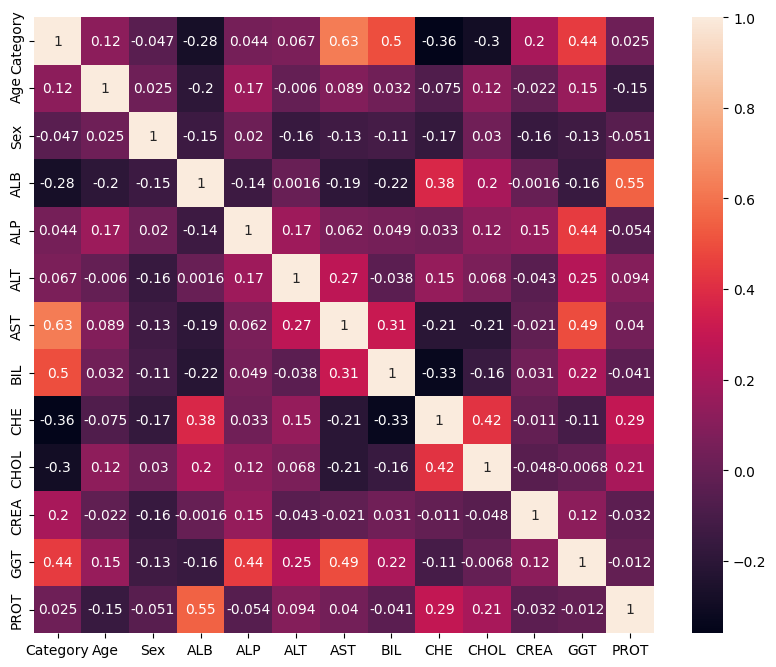

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

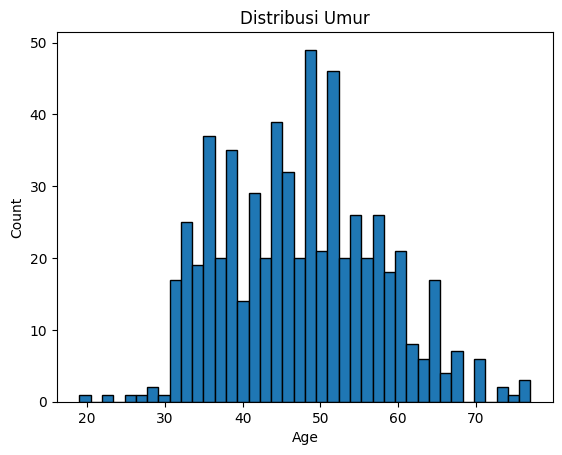

In [25]:
plt.hist(df['Age'], bins=40, edgecolor='black')
plt.title('Distribusi Umur')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

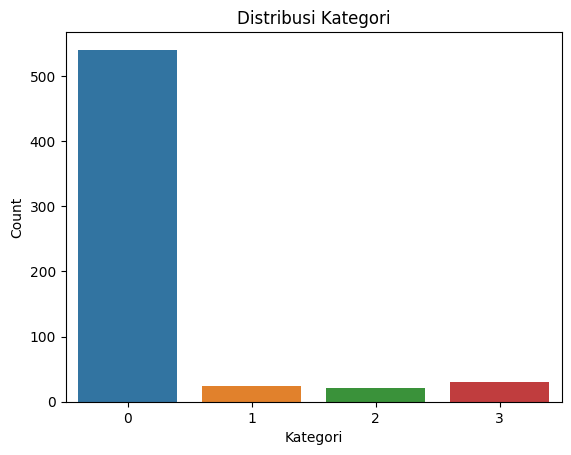

In [26]:
sns.countplot(x='Category', data=df)

plt.title('Distribusi Kategori')
plt.xlabel('Kategori')
plt.ylabel('Count')

plt.show()

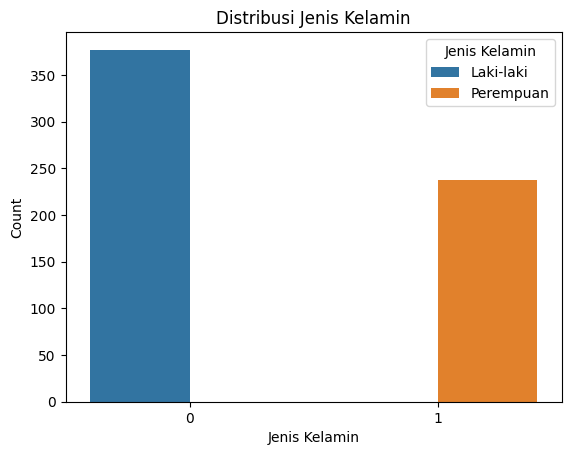

In [27]:
sns.countplot(x='Sex', data=df, hue='Sex')

plt.title('Distribusi Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Count')

plt.legend(title='Jenis Kelamin', labels=['Laki-laki', 'Perempuan'])

plt.show()

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [29]:
features = ['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

x = df[features]
y = df['Category']
x.shape, y.shape

((615, 12), (615,))

In [30]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

# Inisialisasi model Regresi Logistik
logistic_model = LogisticRegression()

# Latih model menggunakan data latih
logistic_model.fit(X_train, y_train)

# Lakukan prediksi menggunakan data uji
predictions = logistic_model.predict(X_test)

# Hitung akurasi prediksi
accuracy = accuracy_score(y_test, predictions)
print("Akurasi prediksi: {:.2f}%".format(accuracy * 100))

Akurasi prediksi: 91.87%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
# df['Category'].replace({
#     '0=Blood Donor': 0,
#     '0s=suspect Blood Donor': 0,
#     '1=Hepatitis': 1,
#     '2=Fibrosis': 2,
#     '3=Cirrhosis': 3})

# df['Sex'].replace({'m': 0, 'f': 1})

# features = ['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

input_data = np.array([[19, 1, 45, 80, 30, 25, 0.8, 16, 9, 199.5, 55, 44.80]])

prediction = logistic_model.predict(input_data)

if prediction[0] == 0:
    print('Pasien diprediksi sebagai Blood Donor.')
elif prediction[0] == 1:
    print('Pasien diprediksi sebagai Hepatitis.')
elif prediction[0] == 2:
    print('Pasien diprediksi sebagai Fibrosis.')
else:
    print('Pasien diprediksi sebagai Cirrhosis.')

Pasien diprediksi sebagai Blood Donor.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [32]:
import pickle

filename = 'prediksi_hepatitisC.sav'
pickle.dump(logistic_model,open(filename,'wb'))